In [2]:
#Importar la librería pandas
#Se necesita instalar por primera vez
#Esta librería se usa para el preprocesamiento de datos y el análisis exploratorio
import pandas as pd
from random import sample
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 500)
#Cuando se configura el valor a None, muestra todos los items
pd.set_option('display.max_seq_items', None)

In [3]:
#Cargar los datos con la funcion read_csv



complete_data_set = pd.read_csv("../datos/MULTINIVEL_AO.csv",
                         encoding='latin-1')

# Descripción general del conjunto de datos y de la variable objetivo:

In [6]:
complete_data_set.describe()
complete_data_set['casos_'].describe()

count    134640.000000
mean          0.294430
std           0.778407
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          17.000000
Name: casos_, dtype: float64

In [12]:
#Saber el valor de los primeros 6 registros
complete_data_set.head(20)


,Unnamed: 0,Unnamed: 0.1,ordensatscan,ordenstata,cod_munici,nombremunicipio,cod_deparata,departamento,cod_region,region,casos_,fecha,aÃ±o,periodo,month,bimestre,mes,mmyy,danemes,codepisodioONI,ONI,intensidadONI,codintensidadONI,antropica,bosques,cultipermanentes,cultitransitorios,herbazales,mosaico,pastos,vegetasecundaria,zonasacuaticas,otrascoberturas,arido,seco,humedo,pluvial,msnm,minmsnm,maxmsnm,rangomsnm,deforestacion,cuerposdeagua,zonasinundables,zonassusceptiblesdeinundacin,temppromedio,mintemperatura,maxtemperatura,cmprecipitaprom,cmminprecipitacion,cmmaxprecipitacion,coberturaeducacion,saberpro,analfabetismo,mortalidadinfantil,vacunacion,acueducto,deficitviviendacualitativo,deficitviviendacuantitativo,dimencalidaddevida,pob_resto/pob_total,densidadpoblacion,crecimipoblacion,penetracioninternet,dimenurbana,ingresotributario,ingresosmunicipales,dispariedadeconomica,ipm,dimeneconomica,homicidios100k,secuestros100k,hurtos100k,coca,dimseguri,Temperatura,Temperatura1,Temperatura2,Temperatura3,Temperatura4,Temperatura5,Temperatura6,PrecipitaciÃ³n,PrecipitaciÃ³n1,PrecipitaciÃ³n2,PrecipitaciÃ³n3,PrecipitaciÃ³n4,PrecipitaciÃ³n5,PrecipitaciÃ³n6,AltTemp,AltTemp1,AltTemp2,AltTemp3,AltTemp4,AltTemp5,AltTemp6,AltPrec,AltPrec1,AltPrec2,AltPrec3,AltPrec4,AltPrec5,AltPrec6,altTempNiÃ±o-ene07-feb07,altPrecNiÃ±o-ene07-feb07,altTempNeutro-mar07-may07,altPrecNeutro-mar07-may07,altTempNiÃ±a-jun07-jul08,altPrecNiÃ±a-jun07-jul08,altTempNeutro-ago08-may09,altPrecNeutro-ago08-may09,altTempNiÃ±o-jun09-may10,altPrecNiÃ±o-jun09-may10,altTempNiÃ±a-jun10-jun11,altPrecNiÃ±a-jun10-jun11,altTempNiÃ±a-jul11-abr12,altPrecNiÃ±a-jul11-abr12,altTempNeutro-may12-ene15,altPrecNeutro-may12-ene15,altTempNiÃ±o-feb15-may16,altPrecNiÃ±o-feb15-may16,altTempNeuto-jun16-jun16,altPrecNeuto-jun16-jun16,altTempNiÃ±ajul16-dic16,altPrecNiÃ±ajul16-dic16,total_poblacion,PromedioTemp,PromedioPrec
0,5001001,0,1,1,5001,MEDELLIN,5,ANTIOQUIA,2,Andina,0,01/01/2007,2007,1,jan,1,1,Jan-07,5001001,2,NiÂ¤o,Debil,1,31.909668,17.627031,0.41989,0.0,2.15523,16.139624,19.920835,11.475942,0.310049,0.041732,0.0,64.677795,35.322208,0.0,2238.461426,1200,3000,1800,2.659573,0.321195,0.0,0.321195,16.826923,13.4,21.5,213.3199,197.602158,229.037628,0.57,46.042015,0.041422,13.543017,0.878,0.974076,0.0727,0.0673,0.788438,0.012436,6307.811523,0.041857,0.174289,1.0,460.079987,1837877.75,1.77976,0.323973,1.0,52.068295,0.417884,353.487732,0.0,0.450000,15.572588,NaN,NaN,NaN,NaN,NaN,NaN,175.124096,NaN,NaN,NaN,NaN,NaN,NaN,-0.699852,NaN,NaN,NaN,NaN,NaN,NaN,1.347751,NaN,NaN,NaN,NaN,NaN,NaN,-2.111951,1.227357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2265244,16.272441,129.924380
1,5001002,1,1123,2,5001,MEDELLIN,5,ANTIOQUIA,2,Andina,0,01/02/2007,2007,2,feb,1,2,feb-07,5001002,2,NiÂ¤o,Debil,1,31.909668,17.627031,0.41989,0.0,2.15523,16.139624,19.920835,11.475942,0.310049,0.041732,0.0,64.677795,35.322208,0.0,2238.461426,1200,3000,1800,2.659573,0.321195,0.0,0.321195,16.826923,13.4,21.5,213.3199,197.602158,229.037628,0.57,46.042015,0.041422,13.543017,0.878,0.974076,0.0727,0.0673,0.788438,0.012436,6307.811523,0.041857,0.174289,1.0,460.079987,1837877.75,1.77976,0.323973,1.0,52.068295,0.417884,353.487732,0.0,0.446714,14.801041,15.572588,NaN,NaN,NaN,NaN,NaN,65.473509,175.124096,NaN,NaN,NaN,NaN,NaN,-1.811917,-0.699852,NaN,NaN,NaN,NaN,NaN,0.460112,1.347751,NaN,NaN,NaN,NaN,NaN,-2.111951,1.227357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2265244,16.612959,142.411518
2,5001003,2,2245,3,5001,MEDELLIN,5,ANTIOQUIA,2,Andina,0,01/03/2007,2007,3,mar,2,3,mar-07,5001003,0,Neutro,Ninguna,0,31.909668,17.627031,0.41989,0.0,2.15523,16.139624,19.920835,11.475942,0.310049,0.041732,0.0,64.677795,35.322208,0.0,2238.461426,1200,3000,1800,2.659573,0.321195,0.0,0.321195,16.826923,13.4,21.5,213.3199,197.602158,229.037628,0.57,46.042015,0.041422,13.543017,0.878,0.974076,0.0727,0.0673,0.788438,0.012436,6307.811523,0.041857,0.174289,1.0,460.079987,1837877.75,1.77976,0.323973

# Municipios con y sin casos reportados

In [8]:
casosTrue = complete_data_set.query('casos_ > 0')
municipioTrue=casosTrue["nombremunicipio"]
municipioTrue = municipioTrue.drop_duplicates()
municipioAll = complete_data_set["nombremunicipio"]
municipioAll = municipioAll.drop_duplicates()
municipioFalse = pd.concat([municipioAll, municipioTrue]).drop_duplicates(keep=False)
municipioFalse
print('Cantidad de municipios con almenos un caso reportado:')
print(municipioTrue.shape[0])
print('Cantidad de municipios sin casos reportados:')
print(municipioFalse.shape[0])
print('municipios sin casos reportados')
print(municipioFalse)
#resumen = municipioTrue.append(municipioFalse)#pd.concat([municipioTrue.to_frame(),municipioFalse.to_frame()], ignore_index=True, axis=1)
#resumen['municipios sin casos reportados'] = municipioFalse.to_frame()
#resumen.columns = ['municipios con casos reportados', 'municipios sin casos reportados']
#resumen.to_csv('Municipios con casos ao.csv', encoding='latin-1')
#resumen.head()


Cantidad de municipios con almenos un caso reportado:
975
Cantidad de municipios sin casos reportados:
147
municipios sin casos reportados
9960                                              RETIRO
11040                             SAN JOSE DE LA MONTANA
23520                                            ALMEIDA
23760                                           ARCABUCO
23880                                          BELEN_BOY
24120                                          BETEITIVA
24240                                            BOAVITA
24480                                        BRICENO_BOY
24720                                           BUSBANZA
25080                                            CERINZA
25560                                              CHITA
25800                                            CHIVATA
25920                                        CIENEGA_BOY
26040                                            COMBITA
26280                                           CORRALES
26640 

# Datos Erroneos y Faltantes

In [77]:
#Columnas donde el tipo de dato es distinto a int o a float (Posibles errores en esas columnas). En este caso el resultado muestra las columnas que contienen strings 
non_number_variables = complete_data_set.dtypes[(complete_data_set.dtypes !=  'int64') & (complete_data_set.dtypes !=  'float64')]
non_number_variables


nombremunicipio    object
departamento       object
region             object
fecha              object
month              object
mmyy               object
ONI                object
intensidadONI      object
dtype: object

In [52]:
#Columnas en las cuales NaN no es un valor faltante, si no que por su naturaleza estos valores deben existir (Correimientos, eventos que solo ocurren en ciertos periodos)
cols_where_nan_isnt_missing_value =['Temperatura1',
       'Temperatura2', 'Temperatura3', 'Temperatura4', 'Temperatura5',
       'Temperatura6', 'PrecipitaciÃ³n1', 'PrecipitaciÃ³n2',
       'PrecipitaciÃ³n3', 'PrecipitaciÃ³n4', 'PrecipitaciÃ³n5',
       'PrecipitaciÃ³n6', 'AltTemp1', 'AltTemp2', 'AltTemp3',
       'AltTemp4', 'AltTemp5', 'AltTemp6', 'AltPrec1', 'AltPrec2',
       'AltPrec3', 'AltPrec4', 'AltPrec5', 'AltPrec6',
       'altTempNiÃ±o-ene07-feb07', 'altPrecNiÃ±o-ene07-feb07',
       'altTempNeutro-mar07-may07', 'altPrecNeutro-mar07-may07',
       'altTempNiÃ±a-jun07-jul08', 'altPrecNiÃ±a-jun07-jul08',
       'altTempNeutro-ago08-may09', 'altPrecNeutro-ago08-may09',
       'altTempNiÃ±o-jun09-may10', 'altPrecNiÃ±o-jun09-may10',
       'altTempNiÃ±a-jun10-jun11', 'altPrecNiÃ±a-jun10-jun11',
       'altTempNiÃ±a-jul11-abr12', 'altPrecNiÃ±a-jul11-abr12',
       'altTempNeutro-may12-ene15', 'altPrecNeutro-may12-ene15',
       'altTempNiÃ±o-feb15-may16', 'altPrecNiÃ±o-feb15-may16',
       'altTempNeuto-jun16-jun16', 'altPrecNeuto-jun16-jun16',
       'altTempNiÃ±ajul16-dic16', 'altPrecNiÃ±ajul16-dic16']

In [82]:
#Cración de nuevo data set sin las columnas en las cuales NaN no es un valor faltante 
missing_values_checking_ds = complete_data_set.drop(cols_where_nan_isnt_missing_value, axis=1)
#Nuevo Data Set eliminando todas las filas que contengan algún valor NaN
no_missing_values_ds = missing_values_checking_ds.dropna(axis = 0)
#Nuevo Data Set con las filas que contiene algún valor NaN (missing_values_checking_ds  - no_missing_values_dabss)
missing_values_ds = pd.merge(missing_values_checking_ds, no_missing_values_ds, how='outer', indicator=True)
missing_values_ds= missing_values_ds[missing_values_ds['_merge']=='left_only'][missing_values_checking_ds.columns];

In [86]:
print("Número de filas con valores NaN: ")
print(missing_values_ds.shape[0])


missing_values_ds.isna()
missing_values_ds.to_csv('FilasConDatosFaltantes.csv', encoding='latin-1')
#resumen.to_csv('Municipios con casos ao.csv', encoding='latin-1')

Número de filas con valores NaN: 
2400


In [87]:
#missing_values_ds.iloc[2]
missing_values_ds.isna()

Unnamed: 0                                                                8001003
Unnamed: 0.1                                                                15002
ordensatscan                                                                 2370
ordenstata                                                                  15003
cod_munici                                                                   8001
nombremunicipio                 BARRANQUILLA (Distrito Especial, Industrial y ...
cod_deparata                                                                    8
departamento                                                            ATLANTICO
cod_region                                                                      3
region                                                                     Caribe
casos_                                                                          0
fecha                                                                  01/03/2007
aÃ±o            

In [81]:
#Identificar registros con valores faltantes>
#TODO ver si hay NaN en todas las columnas menos en las que es logico que haya NaN (Corrimientos y Eventos meteorologicos)
pd.isnull(completeDataSet['casos_'])
#pd.isnull(completeDataSet)

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
30        False
31        False
32        False
33        False
34        False
35        False
36        False
37        False
38        False
39        False
40        False
41        False
42        False
43        False
44        False
45        False
46        False
47        False
48        False
49        False
50        False
51        False
52        False
53        False
54        False
55        False
56        False
57        False
58        False
59        False
60        False
61        False
62      

In [50]:
completeDataSet['casos_'].count()

134640

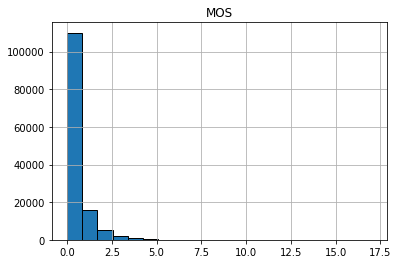

<Figure size 432x288 with 0 Axes>

In [51]:
#Grafico de histogramas para los datos
#TODO hacerlo para todas las variables

plt.title('MOS')
plt.hist(completeDataSet['casos_'], bins=20, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.show()
plt.clf()

In [53]:
completeDataSet.head()

,departamento,cod_region,region,casos_,fecha,aÃ±o,periodo,month,bimestre,mes,mmyy,danemes,codepisodioONI,ONI,intensidadONI,codintensidadONI,antropica,bosques,cultipermanentes,cultitransitorios,herbazales,mosaico,pastos,vegetasecundaria,zonasacuaticas,otrascoberturas,arido,seco,humedo,pluvial,msnm,minmsnm,maxmsnm,rangomsnm,deforestacion,cuerposdeagua,zonasinundables,zonassusceptiblesdeinundacin,temppromedio,mintemperatura,maxtemperatura,cmprecipitaprom,cmminprecipitacion,cmmaxprecipitacion,coberturaeducacion,saberpro,analfabetismo,mortalidadinfantil,vacunacion,acueducto,deficitviviendacualitativo,deficitviviendacuantitativo,dimencalidaddevida,pob_resto/pob_total,densidadpoblacion,crecimipoblacion,penetracioninternet,dimenurbana,ingresotributario,ingresosmunicipales,dispariedadeconomica,ipm,dimeneconomica,homicidios100k,secuestros100k,hurtos100k,coca,dimseguri,Temperatura,Temperatura1,Temperatura2,Temperatura3,Temperatura4,Temperatura5,Temperatura6,PrecipitaciÃ³n,PrecipitaciÃ³n1,PrecipitaciÃ³n2,PrecipitaciÃ³n3,PrecipitaciÃ³n4,PrecipitaciÃ³n5,PrecipitaciÃ³n6,AltTemp,AltTemp1,AltTemp2,AltTemp3,AltTemp4,AltTemp5,AltTemp6,AltPrec,AltPrec1,AltPrec2,AltPrec3,AltPrec4,AltPrec5,AltPrec6,altTempNiÃ±o-ene07-feb07,altPrecNiÃ±o-ene07-feb07,altTempNeutro-mar07-may07,altPrecNeutro-mar07-may07,altTempNiÃ±a-jun07-jul08,altPrecNiÃ±a-jun07-jul08,altTempNeutro-ago08-may09,altPrecNeutro-ago08-may09,altTempNiÃ±o-jun09-may10,altPrecNiÃ±o-jun09-may10,altTempNiÃ±a-jun10-jun11,altPrecNiÃ±a-jun10-jun11,altTempNiÃ±a-jul11-abr12,altPrecNiÃ±a-jul11-abr12,altTempNeutro-may12-ene15,altPrecNeutro-may12-ene15,altTempNiÃ±o-feb15-may16,altPrecNiÃ±o-feb15-may16,altTempNeuto-jun16-jun16,altPrecNeuto-jun16-jun16,altTempNiÃ±ajul16-dic16,altPrecNiÃ±ajul16-dic16
0,ANTIOQUIA,2,Andina,0,01/01/2007,2007,1,jan,1,1,Jan-07,5001001,2,NiÂ¤o,Debil,1,31.909668,17.627031,0.41989,0.0,2.15523,16.139624,19.920835,11.475942,0.310049,0.041732,0.0,64.677795,35.322208,0.0,2238.461426,1200,3000,1800,2.659573,0.321195,0.0,0.321195,16.826923,13.4,21.5,213.3199,197.602158,229.037628,0.57,46.042015,0.041422,13.543017,0.878,0.974076,0.0727,0.0673,0.788438,0.012436,6307.811523,0.041857,0.174289,1.0,460.079987,1837877.75,1.77976,0.323973,1.0,52.068295,0.417884,353.487732,0.0,0.450000,15.572588,NaN,NaN,NaN,NaN,NaN,NaN,175.124096,NaN,NaN,NaN,NaN,NaN,NaN,-0.699852,NaN,NaN,NaN,NaN,NaN,NaN,1.347751,NaN,NaN,NaN,NaN,NaN,NaN,-2.111951,1.227357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ANTIOQUIA,2,Andina,0,01/02/2007,2007,2,feb,1,2,feb-07,5001002,2,NiÂ¤o,Debil,1,31.909668,17.627031,0.41989,0.0,2.15523,16.139624,19.920835,11.475942,0.310049,0.041732,0.0,64.677795,35.322208,0.0,2238.461426,1200,3000,1800,2.659573,0.321195,0.0,0.321195,16.826923,13.4,21.5,213.3199,197.602158,229.037628,0.57,46.042015,0.041422,13.543017,0.878,0.974076,0.0727,0.0673,0.788438,0.012436,6307.811523,0.041857,0.174289,1.0,460.079987,1837877.75,1.77976,0.323973,1.0,52.068295,0.417884,353.487732,0.0,0.446714,14.801041,15.572588,NaN,NaN,NaN,NaN,NaN,65.473509,175.124096,NaN,NaN,NaN,NaN,NaN,-1.811917,-0.699852,NaN,NaN,NaN,NaN,NaN,0.460112,1.347751,NaN,NaN,NaN,NaN,NaN,-2.111951,1.227357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ANTIOQUIA,2,Andina,0,01/03/2007,2007,3,mar,2,3,mar-07,5001003,0,Neutro,Ninguna,0,31.909668,17.627031,0.41989,0.0,2.15523,16.139624,19.920835,11.475942,0.310049,0.041732,0.0,64.677795,35.322208,0.0,2238.461426,1200,3000,1800,2.659573,0.321195,0.0,0.321195,16.826923,13.4,21.5,213.3199,197.602158,229.037628,0.57,46.042015,0.041422,13.543017,0.878,0.974076,0.0727,0.0673,0.788438,0.012436,6307.811523,0.041857,0.174289,1.0,460.079987,1837877.75,1.77976,0.323973,1.0,52.068295,0.417884,353.487732,0.0,0.446714,15.766031,14.801041,15.572588,NaN,NaN,NaN,NaN,260.088027,65.473509,175.124096,NaN,NaN,NaN,NaN,-1.047508,-1.811917,-0.699852,NaN,NaN,NaN,NaN,1.433926,0.460112,1.347751,NaN,NaN,NaN,NaN,NaN,NaN,-2.077455,1.235935,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [52]:
#Eliminar columnas que no son variables


completeDataSet.drop(completeDataSet.columns[[0]], axis=1, inplace=True)
del completeDataSet['ordensatscan']
del completeDataSet['ordenstata']
del completeDataSet['cod_munici']
del completeDataSet['nombremunicipio']
del completeDataSet['cod_deparata']
#del only_variables_df['Promedio 2007-2016']

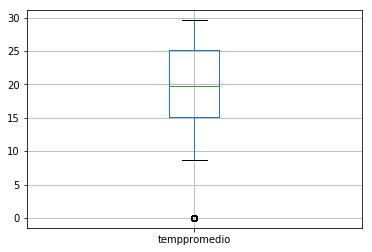

,departamento,cod_region,region,casos_,fecha,aÃ±o,periodo,month,bimestre,mes,mmyy,danemes,codepisodioONI,ONI,intensidadONI,codintensidadONI,antropica,bosques,cultipermanentes,cultitransitorios,herbazales,mosaico,pastos,vegetasecundaria,zonasacuaticas,otrascoberturas,arido,seco,humedo,pluvial,msnm,minmsnm,maxmsnm,rangomsnm,deforestacion,cuerposdeagua,zonasinundables,zonassusceptiblesdeinundacin,temppromedio,mintemperatura,maxtemperatura,cmprecipitaprom,cmminprecipitacion,cmmaxprecipitacion,coberturaeducacion,saberpro,analfabetismo,mortalidadinfantil,vacunacion,acueducto,deficitviviendacualitativo,deficitviviendacuantitativo,dimencalidaddevida,pob_resto/pob_total,densidadpoblacion,crecimipoblacion,penetracioninternet,dimenurbana,ingresotributario,ingresosmunicipales,dispariedadeconomica,ipm,dimeneconomica,homicidios100k,secuestros100k,hurtos100k,coca,dimseguri,Temperatura,Temperatura1,Temperatura2,Temperatura3,Temperatura4,Temperatura5,Temperatura6,PrecipitaciÃ³n,PrecipitaciÃ³n1,PrecipitaciÃ³n2,PrecipitaciÃ³n3,PrecipitaciÃ³n4,PrecipitaciÃ³n5,PrecipitaciÃ³n6,AltTemp,AltTemp1,AltTemp2,AltTemp3,AltTemp4,AltTemp5,AltTemp6,AltPrec,AltPrec1,AltPrec2,AltPrec3,AltPrec4,AltPrec5,AltPrec6,altTempNiÃ±o-ene07-feb07,altPrecNiÃ±o-ene07-feb07,altTempNeutro-mar07-may07,altPrecNeutro-mar07-may07,altTempNiÃ±a-jun07-jul08,altPrecNiÃ±a-jun07-jul08,altTempNeutro-ago08-may09,altPrecNeutro-ago08-may09,altTempNiÃ±o-jun09-may10,altPrecNiÃ±o-jun09-may10,altTempNiÃ±a-jun10-jun11,altPrecNiÃ±a-jun10-jun11,altTempNiÃ±a-jul11-abr12,altPrecNiÃ±a-jul11-abr12,altTempNeutro-may12-ene15,altPrecNeutro-may12-ene15,altTempNiÃ±o-feb15-may16,altPrecNiÃ±o-feb15-may16,altTempNeuto-jun16-jun16,altPrecNeuto-jun16-jun16,altTempNiÃ±ajul16-dic16,altPrecNiÃ±ajul16-dic16
130320,SAN ANDRES,3,Caribe,0,01/01/2007,2007,1,jan,1,1,Jan-07,88001001,2,NiÂ¤o,Debil,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,48.181816,20,80,60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.385,44.000000,0.720000,2.000000,1.3518,0.838000,0.460,0.7200,NaN,0.438320,NaN,NaN,NaN,NaN,0.080000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130321,SAN ANDRES,3,Caribe,0,01/02/2007,2007,2,feb,1,2,feb-07,88001002,2,NiÂ¤o,Debil,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,48.181816,20,80,60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.385,44.000000,0.720000,2.000000,1.3518,0.838000,0.460,0.7200,NaN,0.438320,NaN,NaN,NaN,NaN,0.080000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130322,SAN ANDRES,3,Caribe,0,01/03/2007,2007,3,mar,2,3,mar-07,88001003,0,Neutro,Ninguna,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,48.181816,20,80,60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.385,44.000000,0.720000,2.000000,1.3518,0.838000,0.460,0.7200,NaN,0.438320,NaN,NaN,NaN,NaN,0.080000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130323,SAN ANDRES,3,Caribe,0,01/04/2007,2007,4,apr,2,4,Apr-07,88001004,0,Neutro,Ninguna,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,48.181816,20,80,60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.385,44.000000,0.720000,2.000000,1.3518,0.838000,0.460,0.7200,NaN,0.438320,NaN,NaN,NaN,NaN,0.080000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130324,SAN ANDRES,3,Caribe,0,01/05/2007,2007,5,may,3,5,may-07,88001005,0,Neutro,

In [61]:
#Dibujar grafico de bigotes para las variables
#for i in range(completeDataSet.shape[1]):
#     plt.figure()
#     completeDataSet.boxplot(column = [completeDataSet.columns[9]])
#     plt.savefig("Boxplot/" + str(completeDataSet.columns[9])+".png")
#     plt.close()


plt.figure()
completeDataSet.boxplot(column = [completeDataSet.columns[38]])
#plt.savefig("Boxplot/" + str(completeDataSet.columns[3])+".png")
plt.show()
plt.clf()
plt.close()

casosTrue2 = completeDataSet.query('temppromedio < 5')
casosTrue2


In [63]:
#Normalizar DF con min-max (x - min / max - min)
completeDataSetNormalized = (completeDataSet - completeDataSet.min()) / (completeDataSet.max() - completeDataSet.min())
completeDataSetNormalized.to_csv("completeDataSetNormalized.csv")

TypeError: unsupported operand type(s) for -: 'str' and 'str'

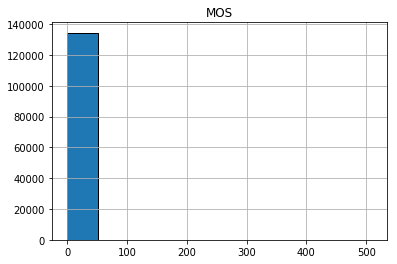

<Figure size 432x288 with 0 Axes>

In [18]:
#Para los normalizados histograma

plt.title('MOS')
plt.hist(completeDataSet['casos_leishmaniasis'], bins=10, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.show()
plt.clf()

## TODO

1. Saber la cantidad de variables y la naturaleza
2. Clasificar variables en Continuas y Discretas (Temperatura, altura, peso son continuos)
3. Hacer gráfico de dispersión(por cada variables, entre variables (por parejas) y matriz de todas las  variables) - cajas - histogramas
3. Hacer proceso de calidad de datos:

3.1 Ruido (Como identificamos ruido?)

3.2 Valores atípicos

3.3 Valores Perdidos

Manejos de valores perdidos:
-ELiminar objetos o variables
- Estimar los valores perdidos
- Ignorar el valor perdido durante el análisis

3.4 Duplicación (Chequearear temperatura)

3.5 Datos erroneos

4.Identificar las preguntas relevantes para el problema y tratar de responderlo
5. Avriguar si es facil obtener la distribucion que mas se ajusta a unos datos
6. Analizar si usar medidas de dispercion no sensibles a datos atípicos
7. Si es posible, hacer histogramas multidimensional entre variable objetivo y otras



# Comandos Utiles


In [ ]:
#Retorna un df con n registros aleatorios 
completeDataSet.sample(5)
#Descripción del conjunto de datos con parametro, percentiles:
completeDataSet.describe([.25, .50, .75, .85, 1])
#Mostrar de una muestra aleatoria
#Creacion de un indice aleatorio
randomIndex = np.array(sample(range(len(completeDataSet)), 5))

#Obtener 5 filas aleatorias
sampleCompleteDataSet = completeDataSet.ix[randomIndex]

#Imprimir el muestreo
sampleCompleteDataSet

#Queries para hacer preguntas de hipotesis a los datos:

completeDataSet.query('msnm == Temperatura')
completeDataSet.query('msnm > Temperatura')

#Eliminar filas que contengan NaN en alguno de sus atributos
no_missing_values_ds = complete_data_set.dropna(axis = 0)

#Eliminar variables o npumericas para normalizar
normalized_ds = complete_data_set.drop(non_number_variables.index, axis = 1)
normalized_ds
